In [43]:
dirFile <- "/Users/hoang/Documents/SaveDataFromServer/SimulatedData/OnlyCaseControlApproximation/"
fileN0 <- dir(dirFile, "RData")

#fileN0 <- fileN0[grep("2classes.6", fileN0)]
#fileN <- fileN[grep(".1000.|.2000.", fileN, invert = TRUE)]
#fileN0 <- fileN0[grep("5000", fileN0)]



In [44]:
head(fileN0)


[1] "result.MCMC.lowerGamma.0.10000.12_16_May_16_2016.ntrio.1024.gammaMeanDN.1.5.pi0.0.06.rhocC.0.0001316553.out.casecontrol.gammaPrior.RData"
[2] "result.MCMC.lowerGamma.0.10000.12_16_May_16_2016.ntrio.1024.gammaMeanDN.1.5.pi0.0.08.rhocC.0.0001316553.out.casecontrol.gammaPrior.RData"
[3] "result.MCMC.lowerGamma.0.10000.12_16_May_16_2016.ntrio.1024.gammaMeanDN.2.5.pi0.0.06.rhocC.0.0001316553.out.casecontrol.gammaPrior.RData"
[4] "result.MCMC.lowerGamma.0.10000.12_16_May_16_2016.ntrio.1024.gammaMeanDN.2.5.pi0.0.06.rhocC.7.213552e-05.out.casecontrol.gammaPrior.RData"
[5] "result.MCMC.lowerGamma.0.10000.12_16_May_16_2016.ntrio.1024.gammaMeanDN.2.5.pi0.0.08.rhocC.0.0001316553.out.casecontrol.gammaPrior.RData"
[6] "result.MCMC.lowerGamma.0.10000.12_16_May_16_2016.ntrio.1024.gammaMeanDN.2.5.pi0.0.08.rhocC.7.213552e-05.out.casecontrol.gammaPrior.RData"

In [45]:
load(paste(dirFile, fileN0[1], sep = ""))
testFitSingleCC

Inference for Stan model: 1767e7f62fa8d34bc294c7be22e9d1a4.
1 chains, each with iter=10000; warmup=5000; thin=10; 
post-warmup draws per chain=500, total post-warmup draws=500.

                        mean se_mean   sd     2.5%      25%      50%      75%
pi0                     0.06    0.00 0.05     0.01     0.02     0.04     0.07
hyperGammaMeanLoFcc     2.01    0.05 1.02     0.90     1.42     1.80     2.22
hyperBetaLoFcc         13.67    0.00 0.01    13.65    13.66    13.67    13.68
lp__                -3532.69    0.08 1.65 -3536.37 -3533.56 -3532.40 -3531.47
                       97.5% n_eff Rhat
pi0                     0.19   500    1
hyperGammaMeanLoFcc     4.88   472    1
hyperBetaLoFcc         13.69   500    1
lp__                -3530.56   411    1

Samples were drawn using NUTS(diag_e) at Mon May 16 15:31:24 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

## Lower Gamma = 0

In [46]:
i = 1
fileN <- fileN0[grep("result.MCMC.lowerGamma.0.5000", fileN0)]
outData <- NULL
for (i in 1:length(fileN)){
  load(paste(dirFile, fileN[i], sep = ""))

  b1 <- as.data.frame(testFitSingleCC)
  
  b0 <- c(pi0, gammaMean)
  b01 <- round(apply(b1, 2, median), 3)[1:2]
#  b02 <- abs(b0 - b01)
  outData <- rbind(outData, c(b0, b01))
}

rownames(outData) <- fileN
rName <- c("pi0", 'gammaMean')
eName <- c("e.pi0", 'e.gammaMean')


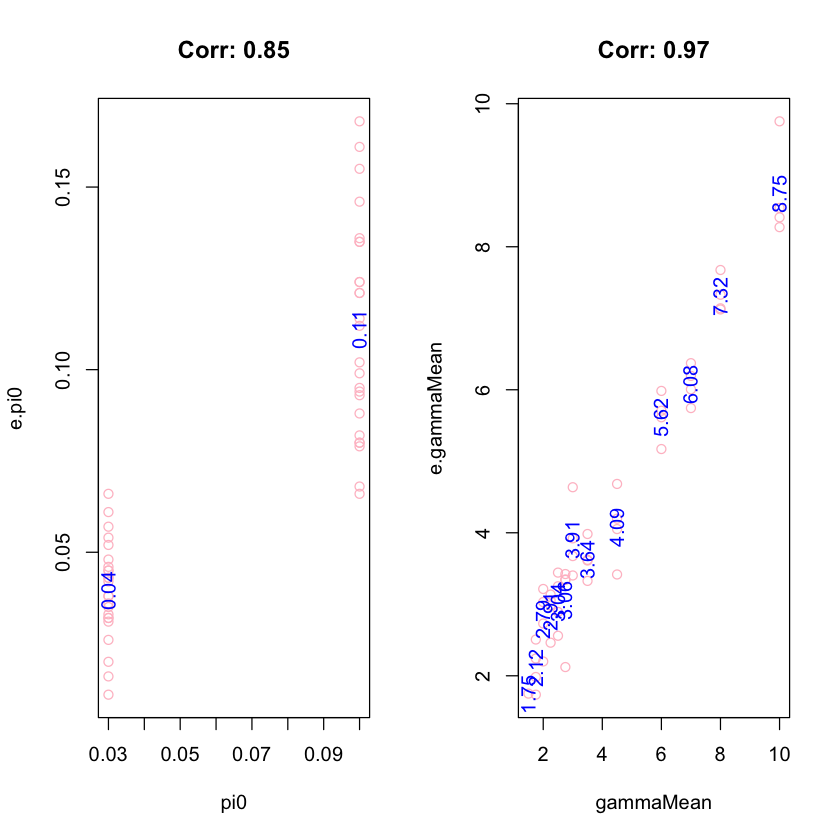

In [47]:

par(mfrow = c(1, 2))
KK <- 2
for (j in 1:KK){
  corJ <- round(cor(outData[, j], outData[, j + KK]), 2)
plot(outData[, j], outData[, j + KK], xlab = rName[j], ylab = eName[j], 
     main = paste('Corr: ', corJ, sep = ''), col = 'pink')
        sTemp <- sapply(split(outData[, j + KK], outData[, j]), mean)
sTemp
text(as.numeric(names(sTemp)), sTemp, round(sTemp, 2), col = 'blue', lwd = 1.5, srt = '90')

}
b2 <- outData[order(abs(outData[, 3])), ]


Inference for Stan model: 1767e7f62fa8d34bc294c7be22e9d1a4.
1 chains, each with iter=10000; warmup=5000; thin=10; 
post-warmup draws per chain=500, total post-warmup draws=500.

                        mean se_mean   sd     2.5%      25%      50%      75%
pi0                     0.06    0.00 0.05     0.01     0.02     0.04     0.07
hyperGammaMeanLoFcc     2.01    0.05 1.02     0.90     1.42     1.80     2.22
hyperBetaLoFcc         13.67    0.00 0.01    13.65    13.66    13.67    13.68
lp__                -3532.69    0.08 1.65 -3536.37 -3533.56 -3532.40 -3531.47
                       97.5% n_eff Rhat
pi0                     0.19   500    1
hyperGammaMeanLoFcc     4.88   472    1
hyperBetaLoFcc         13.69   500    1
lp__                -3530.56   411    1

Samples were drawn using NUTS(diag_e) at Mon May 16 15:31:24 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

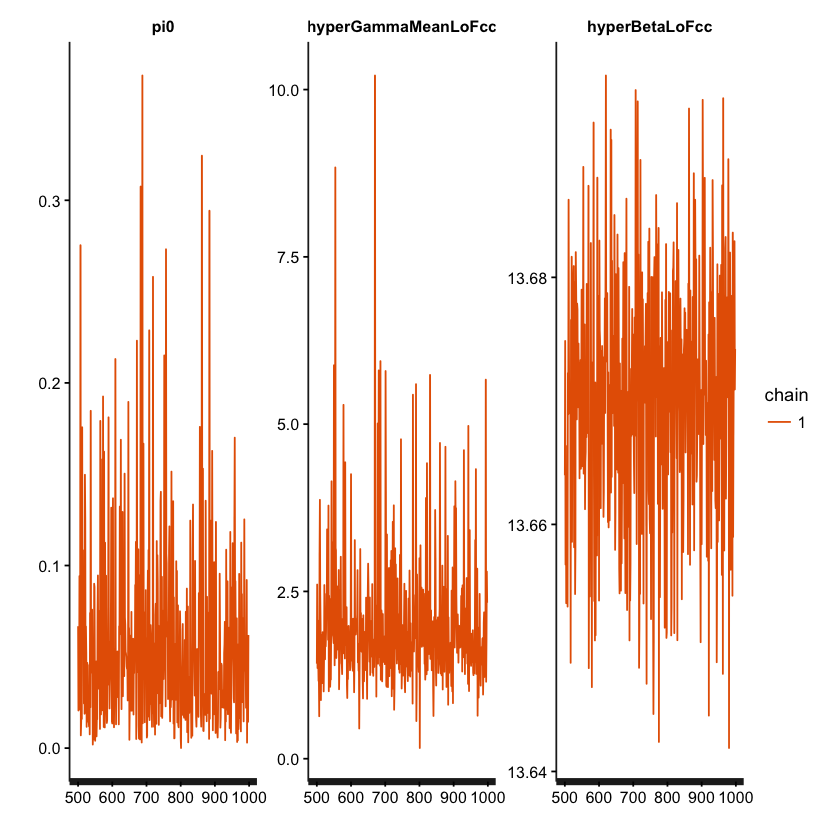

In [48]:
load(paste(dirFile, fileN0[1], sep = ""))
testFitSingleCC
library("rstan")
stan_trace(testFitSingleCC)

## Lower gamma 0.5

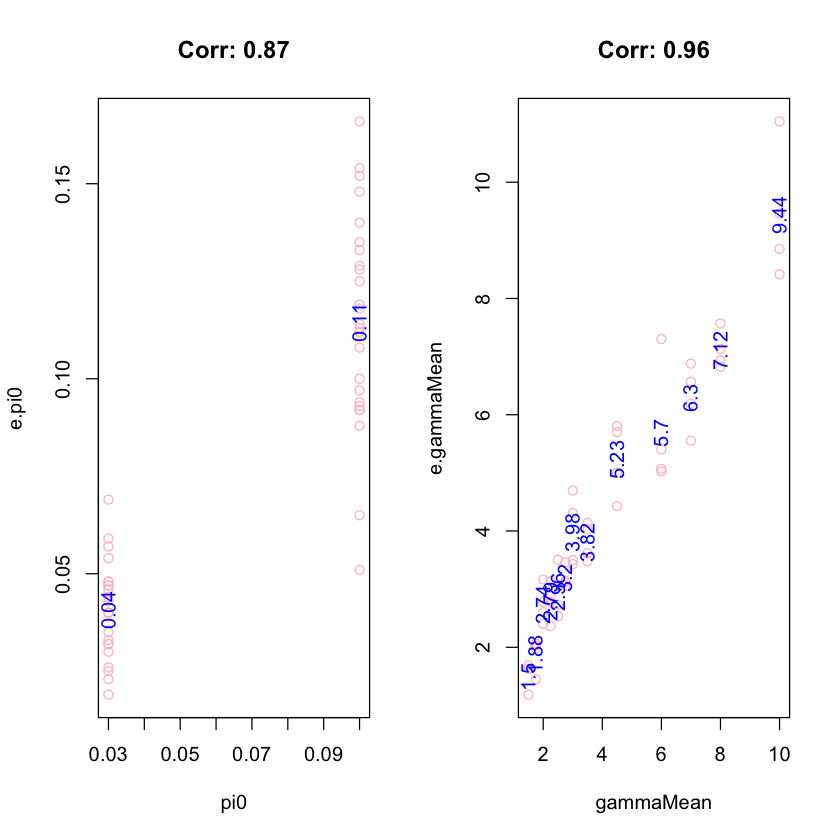

In [49]:
i = 1
fileN <- fileN0[grep("result.MCMC.lowerGamma.0.5.5000", fileN0)]
outData <- NULL
for (i in 1:length(fileN)){
  load(paste(dirFile, fileN[i], sep = ""))

  b1 <- as.data.frame(testFitSingleCC)
  
  b0 <- c(pi0, gammaMean)
  b01 <- round(apply(b1, 2, median), 3)[1:2]
#  b02 <- abs(b0 - b01)
  outData <- rbind(outData, c(b0, b01))
}

rownames(outData) <- fileN
rName <- c("pi0", 'gammaMean')
eName <- c("e.pi0", 'e.gammaMean')


par(mfrow = c(1, 2))
KK <- 2
for (j in 1:KK){
  corJ <- round(cor(outData[, j], outData[, j + KK]), 2)
plot(outData[, j], outData[, j + KK], xlab = rName[j], ylab = eName[j], 
     main = paste('Corr: ', corJ, sep = ''), col = 'pink')
        sTemp <- sapply(split(outData[, j + KK], outData[, j]), mean)
sTemp
text(as.numeric(names(sTemp)), sTemp, round(sTemp, 2), col = 'blue', lwd = 1.5, srt = '90')

}
b2 <- outData[order(abs(outData[, 3])), ]


Inference for Stan model: 1767e7f62fa8d34bc294c7be22e9d1a4.
1 chains, each with iter=10000; warmup=5000; thin=10; 
post-warmup draws per chain=500, total post-warmup draws=500.

                        mean se_mean   sd     2.5%      25%      50%      75%
pi0                     0.06    0.00 0.05     0.01     0.02     0.04     0.07
hyperGammaMeanLoFcc     2.01    0.05 1.02     0.90     1.42     1.80     2.22
hyperBetaLoFcc         13.67    0.00 0.01    13.65    13.66    13.67    13.68
lp__                -3532.69    0.08 1.65 -3536.37 -3533.56 -3532.40 -3531.47
                       97.5% n_eff Rhat
pi0                     0.19   500    1
hyperGammaMeanLoFcc     4.88   472    1
hyperBetaLoFcc         13.69   500    1
lp__                -3530.56   411    1

Samples were drawn using NUTS(diag_e) at Mon May 16 15:31:24 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

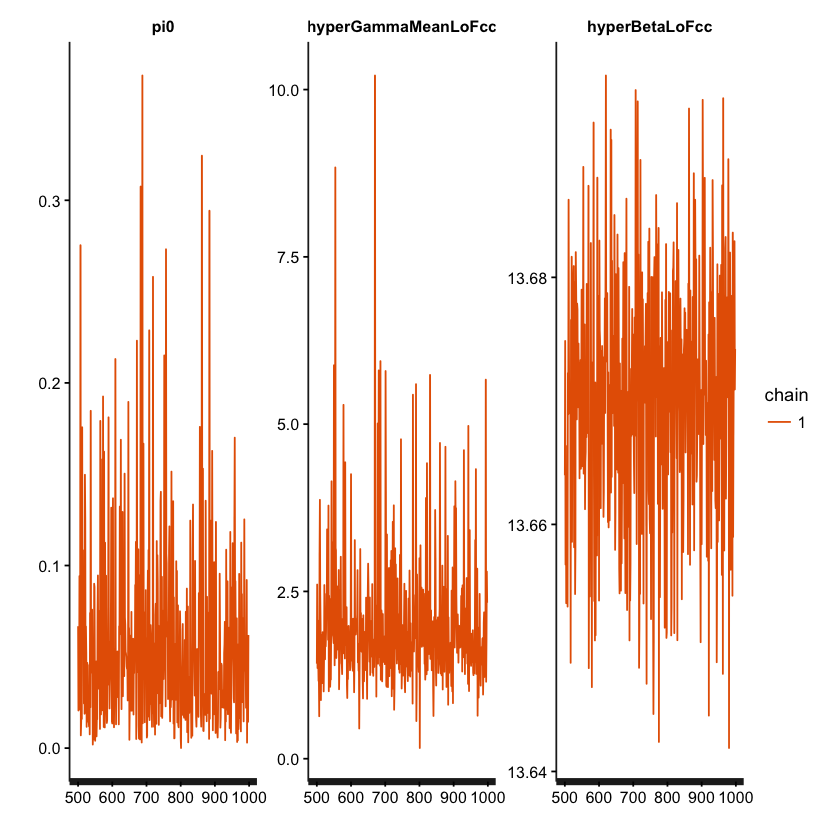

In [50]:
load(paste(dirFile, fileN0[1], sep = ""))
testFitSingleCC
library("rstan")
stan_trace(testFitSingleCC)

## Lower gamma 1

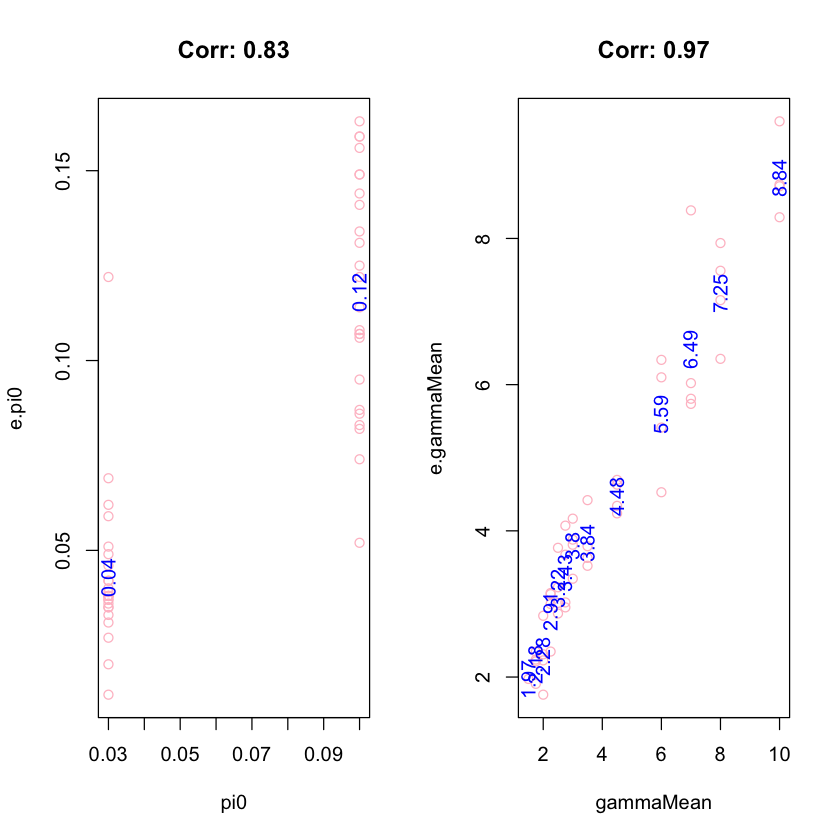

In [51]:
i = 1
fileN <- fileN0[grep("result.MCMC.lowerGamma.1.5000", fileN0)]
outData <- NULL
for (i in 1:length(fileN)){
  load(paste(dirFile, fileN[i], sep = ""))

  b1 <- as.data.frame(testFitSingleCC)
  
  b0 <- c(pi0, gammaMean)
  b01 <- round(apply(b1, 2, median), 3)[1:2]
#  b02 <- abs(b0 - b01)
  outData <- rbind(outData, c(b0, b01))
}

rownames(outData) <- fileN
rName <- c("pi0", 'gammaMean')
eName <- c("e.pi0", 'e.gammaMean')


par(mfrow = c(1, 2))
KK <- 2
for (j in 1:KK){
  corJ <- round(cor(outData[, j], outData[, j + KK]), 2)
plot(outData[, j], outData[, j + KK], xlab = rName[j], ylab = eName[j], 
     main = paste('Corr: ', corJ, sep = ''), col = 'pink')
        sTemp <- sapply(split(outData[, j + KK], outData[, j]), mean)
sTemp
text(as.numeric(names(sTemp)), sTemp, round(sTemp, 2), col = 'blue', lwd = 1.5, srt = '90')

}
b2 <- outData[order(abs(outData[, 3])), ]


Inference for Stan model: 1767e7f62fa8d34bc294c7be22e9d1a4.
1 chains, each with iter=10000; warmup=5000; thin=10; 
post-warmup draws per chain=500, total post-warmup draws=500.

                        mean se_mean   sd     2.5%      25%      50%      75%
pi0                     0.06    0.00 0.05     0.01     0.02     0.04     0.07
hyperGammaMeanLoFcc     2.01    0.05 1.02     0.90     1.42     1.80     2.22
hyperBetaLoFcc         13.67    0.00 0.01    13.65    13.66    13.67    13.68
lp__                -3532.69    0.08 1.65 -3536.37 -3533.56 -3532.40 -3531.47
                       97.5% n_eff Rhat
pi0                     0.19   500    1
hyperGammaMeanLoFcc     4.88   472    1
hyperBetaLoFcc         13.69   500    1
lp__                -3530.56   411    1

Samples were drawn using NUTS(diag_e) at Mon May 16 15:31:24 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

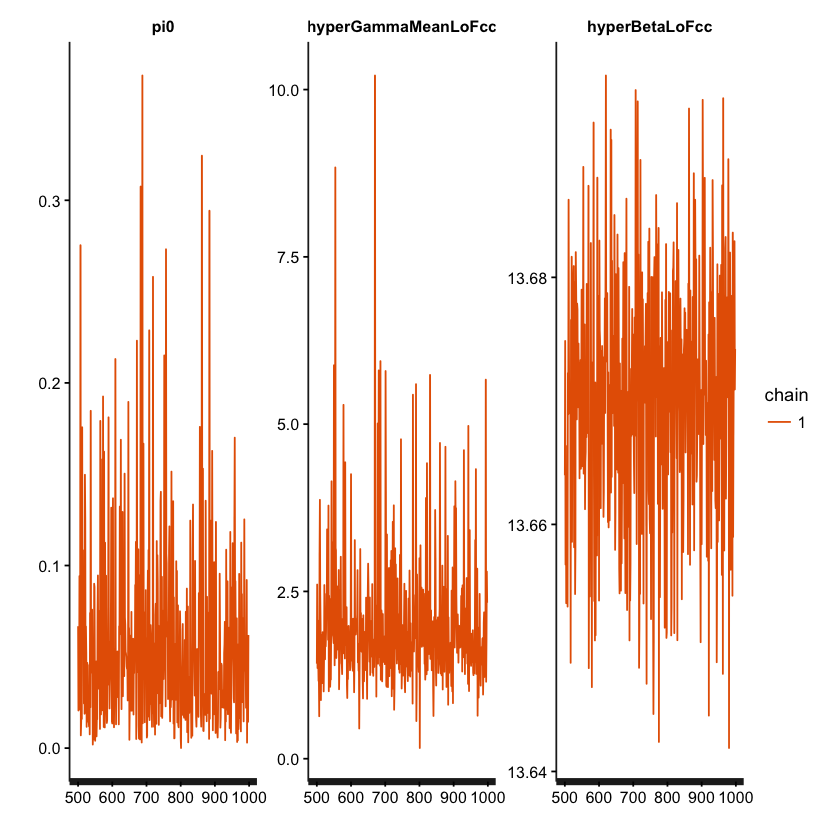

In [52]:
load(paste(dirFile, fileN0[1], sep = ""))
testFitSingleCC
library("rstan")
stan_trace(testFitSingleCC)